<a href="https://colab.research.google.com/github/mariahjackson91/Stroke-Predictions/blob/main/Project_2_Part_3_Resubmit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn to make a nice heatmap for our confusion matrix
import seaborn as sns

#import some necessary tools
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

#import accuracy, precision, recall, classification report, and confusion matrix scoring functions
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay

#Importing the Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo- Data Science/Project 2/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Data Cleaning

In [5]:
# check missing values
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
# fix the missing values
df = df.fillna(df['bmi'].value_counts().index[0])

In [7]:
# check that missing values have been handled
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [8]:
# check for duplicates
df.duplicated().sum()

0

In [9]:
# check for data inconsistancies
for col in df:
  if df[col].dtype == 'object':
    print(col)
    print(df[col].unique())
    print()

gender
['Male' 'Female' 'Other']

ever_married
['Yes' 'No']

work_type
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']

Residence_type
['Urban' 'Rural']

smoking_status
['formerly smoked' 'never smoked' 'smokes' 'Unknown']



In [10]:
df['gender'].replace({'Male':0, 'Female':1, 'Other':2}, inplace=True)
df['gender'].value_counts()

1    2994
0    2115
2       1
Name: gender, dtype: int64

In [11]:
df['ever_married'].replace({'Yes':0, 'No':1}, inplace=True)
df['ever_married'].value_counts()

0    3353
1    1757
Name: ever_married, dtype: int64

In [12]:
df['Residence_type'].replace({'Urban':0, 'Rural':1}, inplace=True)
df['Residence_type'].value_counts()

0    2596
1    2514
Name: Residence_type, dtype: int64

In [13]:
# Examine the number of unique values in columns
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [14]:
# drop ID column
df.drop(columns= ['id'], inplace= True)

# Univariate Visuals

In [15]:
corr = df.corr()

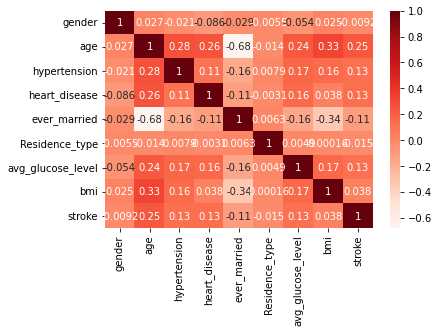

In [16]:
sns.heatmap(corr, cmap = 'Reds', annot= True)

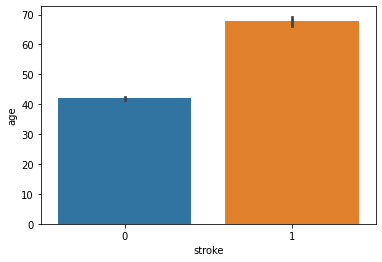

In [17]:
sns.barplot(data=df, x='stroke', y = 'age')

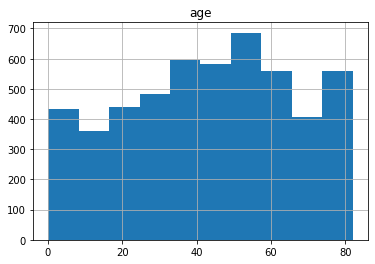

In [18]:
df.hist('age');

# Multivariate Exploratory Visuals

In [19]:
grouped_df = df.groupby('stroke', as_index=False).mean()

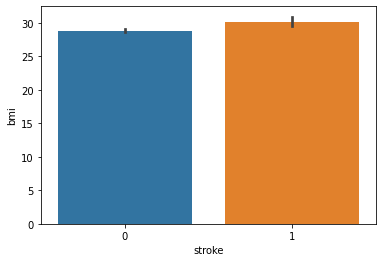

In [20]:
sns.barplot(data=df, x='stroke', y = 'bmi')

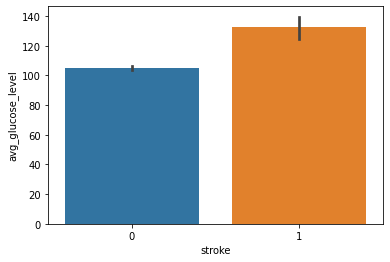

In [21]:
sns.barplot(data=df, x='stroke', y = 'avg_glucose_level')

Above: 2 Bar Graphs showing the correlation between (graph 1) bmi,  (graph 2) average glucose level and whether or not a person has a stoke. From looking at both graphs I am able to see that the higher a persons bmi and average glucose level is, the more likely they are to have a stroke 